# UAS Machine Learning – Task 2

## Feature Engineering and Model Training

### Objective  
Notebook ini bertujuan untuk mengubah data mentah menjadi fitur yang dapat digunakan oleh model machine learning, serta melatih beberapa model untuk mempelajari pola dari data tersebut.

### Feature Engineering  
Tahap ini melibatkan:
- Encoding fitur kategorikal menjadi nilai numerik.
- Normalisasi atau standardisasi fitur numerik agar memiliki skala yang seimbang.
- Pemilihan fitur yang relevan untuk meningkatkan performa model.

### Model Training  
Beberapa model machine learning dan/atau deep learning dilatih menggunakan data training. Proses ini mencakup:
- Inisialisasi model
- Proses forward pass
- Perhitungan loss
- Backpropagation dan optimisasi bobot

Model dilatih selama beberapa epoch hingga konvergen atau mencapai performa yang optimal.

### Output  
Hasil dari notebook ini adalah satu atau lebih model yang telah terlatih dan siap untuk dievaluasi menggunakan data uji.


# Import Libraries dan Load Data
Mengimpor library utama (pandas, numpy) dan membaca dataset. Menampilkan bentuk dan contoh data.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("midterm-regresi-dataset.csv")  
print(df.shape)
display(df.head())


(515344, 91)


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


## Exploratory Data Analysis (EDA)
Menampilkan statistik deskriptif dan jumlah missing value pada setiap kolom.

## EDA

In [3]:
display(df.describe())
print(df.isnull().sum())

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781598,-31.580617,-101.530305,-2.566137,-59.509453,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741877,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478793,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64


## Visualisasi Distribusi Target
Menampilkan histogram distribusi target (kolom pertama) untuk analisis awal.

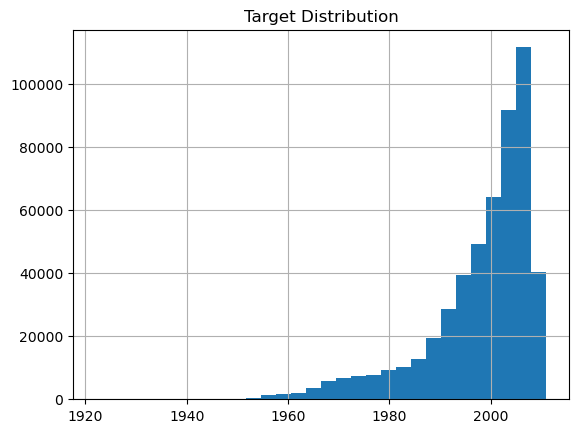

In [6]:
## the target is the first column
import matplotlib.pyplot as plt
df[df.columns[0]].hist(bins=30)
plt.title("Target Distribution")
plt.show()


## Data Cleaning
Melakukan pembersihan data: mengisi missing value, menghapus duplikat, dan menghilangkan outlier.

In [ ]:
# fill missing numeric
df = df.fillna(df.median(numeric_only=True))

# drop duplicates
df = df.drop_duplicates()

In [8]:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

## Feature Engineering
Melakukan encoding fitur kategorikal dan normalisasi fitur numerik.

In [9]:
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype("category").cat.codes

In [11]:
X = df.drop(columns=[df.columns[0]]).values
y = df[df.columns[0]].values

In [12]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [13]:
np.random.seed(42)
idx = np.random.permutation(len(X))
n_train = int(0.8 * len(X))

train_idx, test_idx = idx[:n_train], idx[n_train:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


## Model Regresi PyTorch
Membangun dua model regresi: Linear Regression dan Deep MLP.

Model 1 - Linear Regression

In [14]:
import torch
import torch.nn as nn

Xtr = torch.tensor(X_train, dtype=torch.float32)
ytr = torch.tensor(y_train, dtype=torch.float32).view(-1,1)

class LinearReg(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.fc = nn.Linear(d,1)
    def forward(self,x):
        return self.fc(x)

model1 = LinearReg(X_train.shape[1])


Model 2 - Deep MLP

In [15]:
class MLP(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d,64), nn.ReLU(),
            nn.Linear(64,32), nn.ReLU(),
            nn.Linear(32,1)
        )
    def forward(self,x):
        return self.net(x)

model2 = MLP(X_train.shape[1])


## Fungsi Training
Fungsi untuk melatih model PyTorch dengan Adam optimizer dan MSE loss.

In [16]:
def train(model, X, y, lr=0.001, epochs=1500):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    for _ in range(epochs):
        pred = model(X)
        loss = loss_fn(pred, y)
        opt.zero_grad()
        loss.backward()
        opt.step()


In [17]:
train(model1, Xtr, ytr, lr=0.01)
train(model2, Xtr, ytr, lr=0.001)


## Regression Metrics
Fungsi untuk menghitung metrik regresi: MSE, RMSE, MAE, dan R².

In [18]:
Xte = torch.tensor(X_test, dtype=torch.float32)
yte = y_test

def metrics(model):
    with torch.no_grad():
        pred = model(Xte).numpy().flatten()
    mse = np.mean((pred - yte)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(pred - yte))
    r2 = 1 - np.sum((pred - yte)**2) / np.sum((yte - yte.mean())**2)
    return mse, rmse, mae, r2


In [19]:
m1 = metrics(model1)
m2 = metrics(model2)

print("Linear:", m1)
print("MLP:", m2)


Linear: (np.float64(3957848.7239187444), np.float64(1989.4342723293837), np.float64(1988.9883430038024), np.float64(-64247.8410449645))
MLP: (np.float64(91127.27420136213), np.float64(301.87294380477715), np.float64(242.7897677369114), np.float64(-1478.29397089923))


## Memilih Model Terbaik
Memilih model dengan nilai R² terbaik sebagai model final.

In [20]:
best_model = model2 if m2[3] > m1[3] else model1
print("Best model chosen based on R²")


Best model chosen based on R²


## Final Test
Evaluasi akhir model terbaik pada data test dan menampilkan metrik performa.

In [21]:
mse, rmse, mae, r2 = metrics(best_model)
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")


MSE  : 91127.2742
RMSE : 301.8729
MAE  : 242.7898
R²   : -1478.2940


## Menampilkan Top Prediction
Menampilkan 10 prediksi dengan error terkecil pada data test.

In [22]:
with torch.no_grad():
    preds = best_model(Xte).numpy().flatten()

result = df.iloc[test_idx].copy()
result["prediction"] = preds
result["error"] = np.abs(result["prediction"] - y_test)

display(result.sort_values("error").head(10))


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327,prediction,error
13247,2006,52.80042,31.17779,22.02494,-12.27593,-14.90932,-24.73917,0.48361,0.30130,-0.07309,...,69.18793,22.23134,-2.29869,-85.84889,2.46774,-0.23746,-18.09971,-4.87614,2005.993774,0.006226
421115,2004,52.90346,10.75079,37.39824,-3.34560,-28.73105,-14.06080,-0.86501,0.05326,-2.19936,...,26.52972,22.33009,-3.00242,12.22959,-38.70745,-0.19562,1.53968,-5.41955,2004.011841,0.011841
107229,2009,48.81307,34.10844,2.94172,-12.48874,-3.80309,-24.43868,-9.51348,-4.77975,6.79783,...,39.03365,42.59512,10.06501,31.00925,-23.13689,4.85777,-93.01032,-8.43214,2008.894531,0.105469
169048,2007,52.11322,23.74498,40.40828,4.70334,-13.87701,-11.80910,6.91036,-5.11562,11.93331,...,51.92876,49.69511,1.11779,49.26799,-26.47234,-7.43564,-31.29174,3.65968,2007.141235,0.141235
15241,1998,52.66466,48.37083,36.68059,-3.15052,-18.87446,-16.55789,0.13548,4.22046,4.33753,...,63.58036,34.18779,-1.41492,42.83868,-88.84519,6.32005,-29.24525,-7.60144,1998.174438,0.174438
85708,1985,50.10192,-9.27952,29.63467,0.18714,-17.91887,-14.47529,-12.61192,-8.42073,1.07265,...,-19.82551,20.80400,-4.54472,-10.84104,26.31352,-0.58216,51.26341,1.49643,1985.182983,0.182983
47926,2002,50.25275,61.21341,45.06485,0.48569,-32.35936,-31.69358,26.34936,3.78143,19.58866,...,40.79823,15.09522,9.25889,-3.20568,24.49304,-0.69539,-0.44830,-3.31625,2001.798218,0.201782
484779,2009,50.82932,44.61172,-5.87552,-13.42301,-6.43875,-11.37486,-2.51970,1.51948,6.32364,...,22.99018,43.39212,-3.77563,12.24079,2.95134,6.82280,-28.15002,-7.18761,2009.295532,0.295532
422998,1992,46.93840,25.35061,54.45695,4.91689,-36.72283,-27.01231,17.41789,0.78029,17.22499,...,-53.02619,11.35711,-0.15782,11.96368,-69.54235,1.99482,-8.68208,-2.84520,1992.295532,0.295532
389956,2009,41.87599,-11.34737,9.97161,-5.03827,-15.29728,-11.54178,0.65933,5.06288,-3.77264,...,-22.93509,58.45172,5.20259,5.59360,5.46497,0.74142,54.48543,8.89261,2009.372925,0.372925
